In [ ]:
import pandas as pd
from numpy import *

In [ ]:
# Get lifestyle columms
lifestyle = asarray(['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker'])
# Get symptom columns
symptoms = asarray(['Chest Pain', 'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath', 'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold', 'Dry Cough', 'Snoring'])

In [ ]:
# Define a dictionary to convert levels to an unsigned integer
levels = {"High": 2, "Medium": 1, "Low": 0}

# Read the csv into pandas
dataset = pd.read_csv("./data.csv")
# Use Index and Patient ID as index
dataset = dataset.set_index(["index", "Patient Id"])
# Remove duplicate rows
dataset = dataset.drop_duplicates()
# Conevert level to an integer with declared dictionary
dataset["Level_Int"] = dataset["Level"].apply(lambda x: levels[x])

# Convert dataframe to numpy array
lifestyle_df = asarray(dataset[lifestyle].to_numpy())
symptoms_df = asarray(dataset[symptoms])
risk_df = asarray(dataset["Level_Int"])

In [ ]:
lifestyle_df.corr()

AttributeError: 'numpy.ndarray' object has no attribute 'corr'

In [ ]:
dataset.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level_Int
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,38.236842,1.414474,3.717105,4.480263,5.046053,4.710526,4.486842,4.243421,4.427632,4.414474,3.973684,4.151316,4.388158,4.796053,3.763158,3.828947,4.269737,3.776316,3.750000,3.894737,3.480263,3.684211,2.921053,1.039474
std,11.798382,0.494259,1.978084,2.601503,2.027424,2.158095,2.143794,1.880527,2.151857,2.120365,2.473562,2.263327,2.278751,2.453107,2.230840,2.233924,2.263943,2.036740,2.196475,2.344948,1.848466,2.047195,1.542022,0.812824
min,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,28.000000,1.000000,2.000000,2.000000,3.750000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,37.000000,1.000000,3.000000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,1.000000
75%,46.000000,2.000000,6.000000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,2.000000
max,73.000000,2.000000,8.000000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,8.000000,8.000000,9.000000,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000,2.000000


<AxesSubplot: >

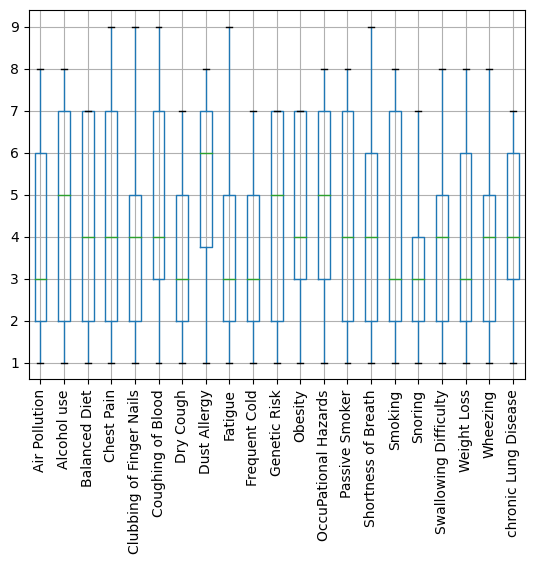

In [ ]:
dataset[dataset.columns.difference(["Age", "Gender", "Level_Int"])].boxplot(rot=90)

In [ ]:
from sklearn.model_selection import train_test_split

train_ls_x, test_ls_x, train_sym_x, test_sym_x, train_y, test_y = \
        train_test_split(lifestyle_df, symptoms_df, risk_df, train_size=.8, random_state=5483)

In [ ]:
from scipy.stats import entropy

print(lifestyle[flip(argsort(entropy(train_ls_x)))])
print(symptoms[flip(argsort(entropy(train_sym_x)))])

['Age' 'Gender' 'Dust Allergy' 'chronic Lung Disease' 'Genetic Risk'
 'OccuPational Hazards' 'Obesity' 'Balanced Diet' 'Passive Smoker'
 'Air Pollution' 'Alcohol use' 'Smoking']
['Shortness of Breath' 'Coughing of Blood' 'Chest Pain' 'Wheezing'
 'Frequent Cold' 'Snoring' 'Swallowing Difficulty'
 'Clubbing of Finger Nails' 'Dry Cough' 'Fatigue' 'Weight Loss']


1.0
1.0


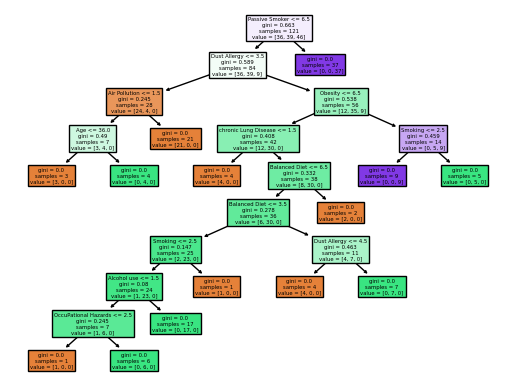

In [ ]:
from sklearn import tree
from sklearn.metrics import accuracy_score, f1_score

dt = tree.DecisionTreeClassifier(max_depth=100, criterion="gini", random_state=5483)
dt.fit(train_ls_x, train_y)

pred_y = dt.predict(test_ls_x)
print(accuracy_score(test_y, pred_y))
print(f1_score(test_y, pred_y, average="weighted"))

_ = tree.plot_tree(dt, feature_names=lifestyle, filled=True)

1.0
1.0


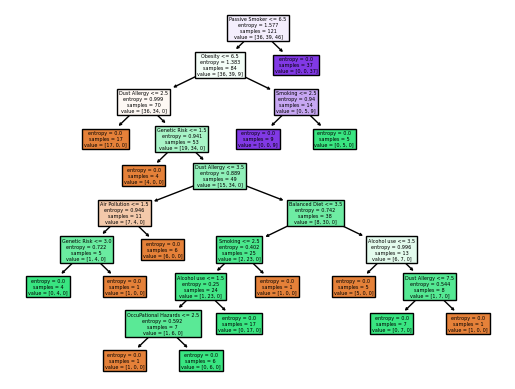

In [ ]:
dt = tree.DecisionTreeClassifier(max_depth=10, criterion="entropy", random_state=5483)
dt.fit(train_ls_x, train_y)

pred_y = dt.predict(test_ls_x)
print(accuracy_score(test_y, pred_y))
print(f1_score(test_y, pred_y, average="weighted"))

_ = tree.plot_tree(dt, feature_names=lifestyle, filled=True)

In [ ]:
dt = tree.DecisionTreeClassifier(max_depth=10, criterion="entropy", random_state=5483)
dt.fit(train_sym_x, train_y)

pred_y = dt.predict(test_sym_x)
print(accuracy_score(test_y, pred_y))
print(f1_score(test_y, pred_y, average="weighted"))

_ = tree.plot_tree(dt, feature_names=symptoms, filled=True)

NameError: ignored

In [ ]:
path = dt.cost_complexity_pruning_path(train_ls_x, train_y)
path

{'ccp_alphas': array([0.        , 0.02478171, 0.02983174, 0.03353144, 0.03593815,
        0.05269882, 0.10879342, 0.16581281, 0.2731783 , 0.61713441]),
 'impurities': array([0.        , 0.04956343, 0.07939517, 0.11292661, 0.14886476,
        0.41235888, 0.5211523 , 0.68696511, 0.9601434 , 1.57727781])}

1.0
1.0


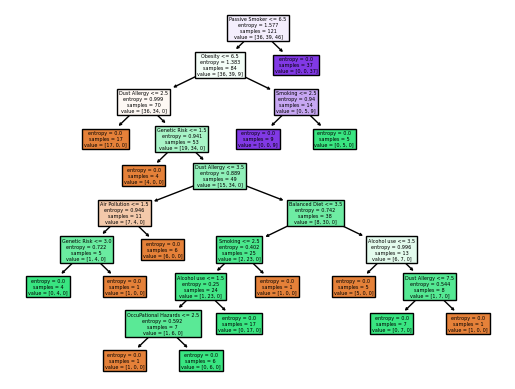

In [ ]:
dt = tree.DecisionTreeClassifier(max_depth=10, criterion="entropy", random_state=5483)
dt.fit(train_ls_x, train_y)

pred_y = dt.predict(test_ls_x)
print(accuracy_score(test_y, pred_y))
print(f1_score(test_y, pred_y, average="weighted"))

_ = tree.plot_tree(dt, feature_names=lifestyle, filled=True)

In [ ]:
from sklearn.model_selection import GridSearchCV

df_cv = GridSearchCV(tree.DecisionTreeClassifier(max_depth=10, criterion="entropy", random_state=5483), param_grid=pg)
